In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
import pandas as pd
import numpy as np
import cv2
import os
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize

Using TensorFlow backend.


In [0]:
train_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/train/"
test_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/test/"
val_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/val/"

In [0]:
from keras import models
from keras import layers

In [5]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (224, 224, 3))

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(rate=1- 0.7))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(rate = 1-0.7))
model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
conv_base.trainable = False

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [11]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
batch_size = 50
IMG_SHAPE = 224

In [13]:
image_gen = ImageDataGenerator(rescale = 1./255, 
                               horizontal_flip = True,
                              rotation_range=5,
                              width_shift_range= 0.10,
                              height_shift_range= 0.05,
                              zoom_range = 0.15,
                              shear_range = 0.1,
                              vertical_flip = False,
                              fill_mode = 'reflect')

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory= train_dir,
                                               shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 5216 images belonging to 2 classes.


In [14]:
image_val_gen = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                                directory = val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 16 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
                               train_data_gen,
                                steps_per_epoch= 5
                                epochs = 15,
                                 validation_data = val_data_gen,
                                 validation_steps =40)

Epoch 1/15
50/50 [==============================] - 90s 2s/step - loss: 0.1264 - acc: 0.9580 - val_loss: 0.6024 - val_acc: 0.6766
Epoch 2/15
50/50 [==============================] - 73s 1s/step - loss: 0.1218 - acc: 0.9539 - val_loss: 0.7011 - val_acc: 0.7250
Epoch 3/15
50/50 [==============================] - 86s 2s/step - loss: 0.1236 - acc: 0.9536 - val_loss: 0.5812 - val_acc: 0.7453
Epoch 4/15
50/50 [==============================] - 76s 2s/step - loss: 0.1105 - acc: 0.9608 - val_loss: 0.7984 - val_acc: 0.7125
Epoch 5/15
50/50 [==============================] - 81s 2s/step - loss: 0.1243 - acc: 0.9468 - val_loss: 1.0426 - val_acc: 0.6609
Epoch 6/15
50/50 [==============================] - 77s 2s/step - loss: 0.1261 - acc: 0.9536 - val_loss: 0.9826 - val_acc: 0.6453
Epoch 7/15
50/50 [==============================] - 77s 2s/step - loss: 0.0951 - acc: 0.9664 - val_loss: 0.5912 - val_acc: 0.7719
Epoch 8/15
50/50 [==============================] - 79s 2s/step - loss: 0.1145 - acc: 0.95

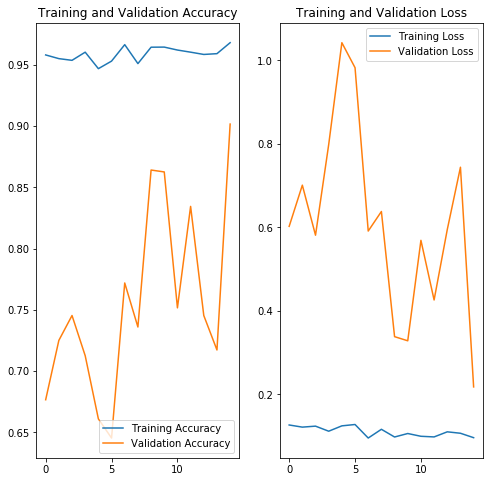

In [22]:
import matplotlib.pyplot as plt

epochs =15
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
image_test_gen = ImageDataGenerator(rescale= 1./255)

test_data_gen = image_val_gen.flow_from_directory(batch_size = batch_size,
                                                directory = test_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 624 images belonging to 2 classes.


In [25]:
scores = model.evaluate_generator(test_data_gen)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 90.54%


In [27]:
import numpy
test_steps_per_epoch = numpy.math.ceil(test_data_gen.samples / test_data_gen.batch_size)

predictions = model.predict_generator(test_data_gen, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)



##Get ground-truth classes and class-labels



true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys())   


##Use scikit-learn to get statistics
import sklearn.metrics as metrics

report = metrics.confusion_matrix(true_classes, predicted_classes, target_names=class_labels)
print(report) 

TypeError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
report = confusion_matrix(true_classes, predicted_classes)


In [29]:
print(report)

[[234   0]
 [390   0]]
